In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('Seasons_Stats.csv')
df = df[df['Year'] >= 1980].iloc[:,1:]    # Only choosing data since year 1980 because of the draft pick dataset
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)
df.head(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0


In [3]:
col_percent = []
for col in df.columns:
  if '%' in col:
    col_percent.append(col)
# Getting rid of all the percentage variables so we are only left with varibales that can be summed up
df.drop(columns = col_percent, inplace = True)
df.drop(columns = ['blanl', 'blank2'], inplace = True)
df.fillna(0, inplace = True)
df.head(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,3PAr,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,0.0,3143.0,25.3,0.001,...,476.0,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,0.0,1222.0,11.0,0.003,...,82.0,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980.0,Alvan Adams,C,25.0,PHO,75.0,0.0,2168.0,19.2,0.002,...,236.0,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0


In [4]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', '3PAr',
       'FTr', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG',
       'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
cols_sum = ['Player', 'MP', 'WS', 'BPM', 'FG', '3P', '2P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'PTS']
df = df.loc[:, cols_sum].groupby('Player').sum().reset_index()
df

,Player,MP,WS,BPM,FG,3P,2P,FT,TRB,AST,STL,BLK,PTS
0,A.C. Green,39044.0,104.2,-1.5,4778.0,125.0,4653.0,3247.0,10129.0,1469.0,1103.0,562.0,12928.0
1,A.J. Bramlett,61.0,-0.2,-16.8,4.0,0.0,4.0,0.0,22.0,0.0,1.0,0.0,8.0
2,A.J. English,3108.0,1.1,-10.2,617.0,9.0,608.0,259.0,315.0,320.0,57.0,24.0,1502.0
3,A.J. Guyton,1246.0,0.3,-33.0,166.0,73.0,93.0,37.0,80.0,147.0,20.0,12.0,442.0
4,A.J. Hammons,163.0,0.0,-5.6,17.0,5.0,12.0,9.0,36.0,4.0,1.0,13.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Zeljko Rebraca,3553.0,8.7,-24.4,522.0,0.0,522.0,323.0,746.0,94.0,62.0,171.0,1367.0
2831,Zendon Hamilton,1609.0,3.2,-71.6,183.0,0.0,183.0,245.0,475.0,33.0,43.0,28.0,611.0
2832,Zoran Dragic,150.0,-0.1,-20.1,22.0,6.0,16.0,6.0,16.0,10.0,4.0,0.0,56.0
2833,Zoran Planinic,1584.0,1.6,-12.4,197.0,37.0,160.0,130.0,198.0,165.0,58.0,7.0,561.0


In [6]:
np.percentile(df['MP'], 25)
# The 25th percentile of minutes played variable is about 400, so we will drop all the players that have played less than 400 mins.

411.5

In [7]:
df = df[df['MP'] > 400].reset_index()
df = df.iloc[:, 1:]
df

,Player,MP,WS,BPM,FG,3P,2P,FT,TRB,AST,STL,BLK,PTS
0,A.C. Green,39044.0,104.2,-1.5,4778.0,125.0,4653.0,3247.0,10129.0,1469.0,1103.0,562.0,12928.0
1,A.J. English,3108.0,1.1,-10.2,617.0,9.0,608.0,259.0,315.0,320.0,57.0,24.0,1502.0
2,A.J. Guyton,1246.0,0.3,-33.0,166.0,73.0,93.0,37.0,80.0,147.0,20.0,12.0,442.0
3,A.J. Price,4253.0,5.0,-37.3,600.0,233.0,367.0,223.0,409.0,613.0,132.0,9.0,1656.0
4,Aaron Brooks,17088.0,23.2,-38.5,2829.0,1025.0,1804.0,1156.0,1360.0,2485.0,469.0,113.0,7839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,Zaza Pachulia,20390.0,47.0,-10.5,2374.0,0.0,2374.0,2026.0,5729.0,1233.0,699.0,344.0,6774.0
2130,Zeljko Rebraca,3553.0,8.7,-24.4,522.0,0.0,522.0,323.0,746.0,94.0,62.0,171.0,1367.0
2131,Zendon Hamilton,1609.0,3.2,-71.6,183.0,0.0,183.0,245.0,475.0,33.0,43.0,28.0,611.0
2132,Zoran Planinic,1584.0,1.6,-12.4,197.0,37.0,160.0,130.0,198.0,165.0,58.0,7.0,561.0


In [8]:
for col in df.iloc[:, 2:].columns:
  df[col + ' per min'] = df[col] / df['MP']

df.fillna(0, inplace = True)

In [9]:
df_num = df.iloc[:, [0] + [i for i in range(13, df.shape[1])]]
df_num

,Player,WS per min,BPM per min,FG per min,3P per min,2P per min,FT per min,TRB per min,AST per min,STL per min,BLK per min,PTS per min
0,A.C. Green,0.002669,-0.000038,0.122375,0.003202,0.119173,0.083163,0.259425,0.037624,0.028250,0.014394,0.331114
1,A.J. English,0.000354,-0.003282,0.198520,0.002896,0.195624,0.083333,0.101351,0.102960,0.018340,0.007722,0.483269
2,A.J. Guyton,0.000241,-0.026485,0.133226,0.058587,0.074639,0.029695,0.064205,0.117978,0.016051,0.009631,0.354735
3,A.J. Price,0.001176,-0.008770,0.141077,0.054785,0.086292,0.052434,0.096167,0.144134,0.031037,0.002116,0.389372
4,Aaron Brooks,0.001358,-0.002253,0.165555,0.059984,0.105571,0.067650,0.079588,0.145424,0.027446,0.006613,0.458743
...,...,...,...,...,...,...,...,...,...,...,...,...
2129,Zaza Pachulia,0.002305,-0.000515,0.116430,0.000000,0.116430,0.099362,0.280971,0.060471,0.034282,0.016871,0.332222
2130,Zeljko Rebraca,0.002449,-0.006867,0.146918,0.000000,0.146918,0.090909,0.209963,0.026457,0.017450,0.048128,0.384745
2131,Zendon Hamilton,0.001989,-0.044500,0.113735,0.000000,0.113735,0.152268,0.295214,0.020510,0.026725,0.017402,0.379739
2132,Zoran Planinic,0.001010,-0.007828,0.124369,0.023359,0.101010,0.082071,0.125000,0.104167,0.036616,0.004419,0.354167


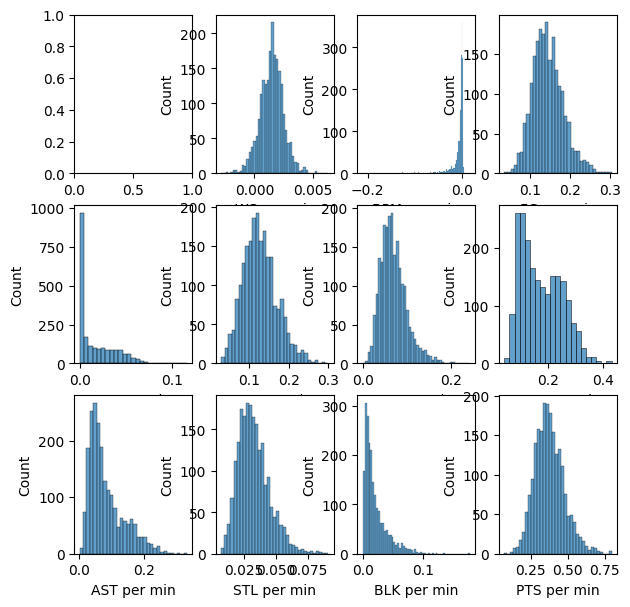

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(7, 7))
for i, ax in enumerate(fig.axes):
  if i == 0:
    continue
  else:
      #ax.tick_params(axis='x', rotation=45)
      sns.histplot(x=df_num.columns[i],alpha=0.7, data=df_num, ax=ax)

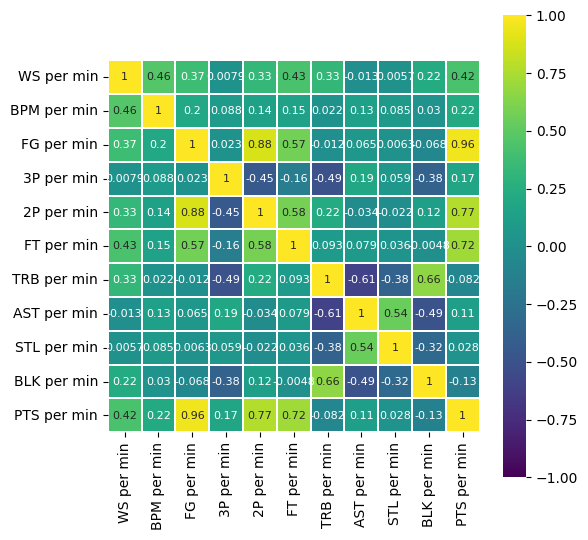

In [11]:
df_corr = df_num.iloc[:,1:].corr()
plt.figure(figsize=(6,6))

sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [12]:
df2 = pd.read_csv('NBA_Draft_1980_2017.tsv', sep='\t')
df2.head(3)

,year,round,pick,player,position,school
0,1980,1,1.0,"Carroll, Joe Barry",F/C,Purdue
1,1980,1,2.0,"Griffith, Darrell",G,Louisville
2,1980,1,3.0,"McHale, Kevin",F/C,Minnesota


In [13]:
df2 = df2[['player', 'pick']]
df2['round'] = '' * len(df2['pick'])
for i in range(len(df2['player'])):
  if df2.loc[i, 'pick'] <= 30:
    df2.loc[i, 'round'] = 1
  else:
    df2.loc[i, 'round'] = 0


df2['First Name'] = '' * len(df2['player'])
df2['Last Name'] = '' * len(df2['player'])
for i in range(len(df2['player'])):
    if ',' in df2['player'][i]:
        df2.loc[i, 'First Name'] = sorted(df2['player'][i].split(', '))[0]
        df2.loc[i, 'Last Name'] = sorted(df2['player'][i].split(', '))[-1]
    else:
        df2.loc[i,'First Name'] = sorted(df2['player'][i].split(' '))[0]
        df2.loc[i,'Last Name'] = sorted(df2['player'][i].split(' '))[-1]

<ipython-input-13-74678c7d3e60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['round'] = '' * len(df2['pick'])


In [14]:
df2

,player,pick,round,First Name,Last Name
0,"Carroll, Joe Barry",1.0,1,Carroll,Joe Barry
1,"Griffith, Darrell",2.0,1,Darrell,Griffith
2,"McHale, Kevin",3.0,1,Kevin,McHale
3,"Ransey, Kelvin",4.0,1,Kelvin,Ransey
4,"Ray, James",5.0,1,James,Ray
...,...,...,...,...,...
2162,Jacob Evans,56.0,0,Evans,Jacob
2163,Jevon Carter,57.0,0,Carter,Jevon
2164,Borisa Simanic,58.0,0,Borisa,Simanic
2165,Bonzie Colson,59.0,0,Bonzie,Colson


In [15]:
df_num['First Name'] = '' * len(df_num['Player'])
df_num['Last Name'] = '' * len(df_num['Player'])
for i in range(len(df_num['Player'])):
    df_num.loc[i,'First Name'] = sorted(df_num['Player'][i].split(' '))[0]
    df_num.loc[i,'Last Name'] = sorted(df_num['Player'][i].split(' '))[-1]

df_num

<ipython-input-15-39d5cd2c17af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['First Name'] = '' * len(df_num['Player'])
<ipython-input-15-39d5cd2c17af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Last Name'] = '' * len(df_num['Player'])


,Player,WS per min,BPM per min,FG per min,3P per min,2P per min,FT per min,TRB per min,AST per min,STL per min,BLK per min,PTS per min,First Name,Last Name
0,A.C. Green,0.002669,-0.000038,0.122375,0.003202,0.119173,0.083163,0.259425,0.037624,0.028250,0.014394,0.331114,A.C.,Green
1,A.J. English,0.000354,-0.003282,0.198520,0.002896,0.195624,0.083333,0.101351,0.102960,0.018340,0.007722,0.483269,A.J.,English
2,A.J. Guyton,0.000241,-0.026485,0.133226,0.058587,0.074639,0.029695,0.064205,0.117978,0.016051,0.009631,0.354735,A.J.,Guyton
3,A.J. Price,0.001176,-0.008770,0.141077,0.054785,0.086292,0.052434,0.096167,0.144134,0.031037,0.002116,0.389372,A.J.,Price
4,Aaron Brooks,0.001358,-0.002253,0.165555,0.059984,0.105571,0.067650,0.079588,0.145424,0.027446,0.006613,0.458743,Aaron,Brooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,Zaza Pachulia,0.002305,-0.000515,0.116430,0.000000,0.116430,0.099362,0.280971,0.060471,0.034282,0.016871,0.332222,Pachulia,Zaza
2130,Zeljko Rebraca,0.002449,-0.006867,0.146918,0.000000,0.146918,0.090909,0.209963,0.026457,0.017450,0.048128,0.384745,Rebraca,Zeljko
2131,Zendon Hamilton,0.001989,-0.044500,0.113735,0.000000,0.113735,0.152268,0.295214,0.020510,0.026725,0.017402,0.379739,Hamilton,Zendon
2132,Zoran Planinic,0.001010,-0.007828,0.124369,0.023359,0.101010,0.082071,0.125000,0.104167,0.036616,0.004419,0.354167,Planinic,Zoran


In [16]:
merged_pd = pd.merge(df_num,df2, on = ['First Name', 'Last Name'], how='inner')
merged_pd

,Player,WS per min,BPM per min,FG per min,3P per min,2P per min,FT per min,TRB per min,AST per min,STL per min,BLK per min,PTS per min,First Name,Last Name,player,pick,round
0,A.J. English,0.000354,-0.003282,0.198520,0.002896,0.195624,0.083333,0.101351,0.102960,0.018340,0.007722,0.483269,A.J.,English,A.J. English,37.0,0
1,A.J. Guyton,0.000241,-0.026485,0.133226,0.058587,0.074639,0.029695,0.064205,0.117978,0.016051,0.009631,0.354735,A.J.,Guyton,"Guyton, A.J.",32.0,0
2,Aaron Brooks,0.001358,-0.002253,0.165555,0.059984,0.105571,0.067650,0.079588,0.145424,0.027446,0.006613,0.458743,Aaron,Brooks,"Brooks, Aaron",26.0,1
3,Aaron Gordon,0.002037,-0.000343,0.153288,0.026624,0.126664,0.066357,0.218031,0.062727,0.029044,0.023598,0.399556,Aaron,Gordon,"Gordon, Aaron",4.0,1
4,Aaron Gray,0.001572,-0.005756,0.112685,0.000000,0.112685,0.048041,0.311490,0.055568,0.025017,0.023467,0.273412,Aaron,Gray,"Gray, Aaron",49.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Yi Jianlian,0.000513,-0.004323,0.134647,0.012421,0.122226,0.074031,0.221762,0.031799,0.022524,0.030474,0.355747,Jianlian,Yi,"Yi, Jianlian",6.0,1
1324,Yinka Dare,-0.000699,-0.066367,0.085828,0.000000,0.085828,0.060878,0.280439,0.003992,0.011976,0.069860,0.232535,Dare,Yinka,"Dare, Yinka",14.0,1
1325,Zach LaVine,0.000824,-0.001043,0.175778,0.050463,0.125315,0.071825,0.101093,0.112027,0.027586,0.006224,0.473844,LaVine,Zach,"LaVine, Zach",13.0,1
1326,Zach Randolph,0.002378,-0.000410,0.214829,0.005163,0.209666,0.103313,0.295855,0.058081,0.023950,0.008805,0.538133,Randolph,Zach,"Randolph, Zach",19.0,1


In [17]:
merged_pd.columns

Index(['Player', 'WS per min', 'BPM per min', 'FG per min', '3P per min',
       '2P per min', 'FT per min', 'TRB per min', 'AST per min', 'STL per min',
       'BLK per min', 'PTS per min', 'First Name', 'Last Name', 'player',
       'pick', 'round'],
      dtype='object')

In [18]:
merged_pd = merged_pd.iloc[:, [0] + [16] + [15] + [i for i in range(1,12)]]
merged_pd.head(3)

,Player,round,pick,WS per min,BPM per min,FG per min,3P per min,2P per min,FT per min,TRB per min,AST per min,STL per min,BLK per min,PTS per min
0,A.J. English,0,37.0,0.000354,-0.003282,0.198520,0.002896,0.195624,0.083333,0.101351,0.102960,0.018340,0.007722,0.483269
1,A.J. Guyton,0,32.0,0.000241,-0.026485,0.133226,0.058587,0.074639,0.029695,0.064205,0.117978,0.016051,0.009631,0.354735
2,Aaron Brooks,1,26.0,0.001358,-0.002253,0.165555,0.059984,0.105571,0.067650,0.079588,0.145424,0.027446,0.006613,0.458743


In [19]:
# Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = merged_pd.iloc[:,3:]
y = merged_pd.iloc[:,[1]]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
from sklearn.metrics import accuracy_score, f1_score
log_reg = LogisticRegression().fit(X_train, y_train.values.ravel())
y_pred_log = log_reg.predict(X_test)
accuracy_score(y_pred_log, y_test)


0.6691729323308271

In [21]:
log_reg.classes_

array([0, 1])

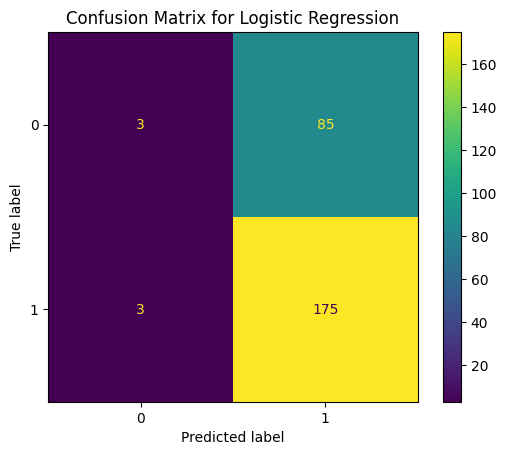

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(cm_log, display_labels = log_reg.classes_)
disp_log.plot()
disp_log.ax_.set_title('Confusion Matrix for Logistic Regression')
plt.show()

In [24]:
f1_score(y_test, y_pred_log)

0.7990867579908677

In [25]:
y_test_df = y_test.copy()
y_test_df['predicted'] = y_pred_log
y_test_df.head(3)

,round,predicted
410,1,1
446,1,1
804,0,1


In [26]:
merged_pd.iloc[y_test_df[y_test_df['round'] != y_test_df['predicted']].index,:]

,Player,round,pick,WS per min,BPM per min,FG per min,3P per min,2P per min,FT per min,TRB per min,AST per min,STL per min,BLK per min,PTS per min
804,Lorenzo Brown,0,52.0,-0.000240,-0.022662,0.103118,0.011990,0.091127,0.028777,0.125899,0.170264,0.052758,0.011990,0.247002
229,Chucky Brown,0,43.0,0.001550,-0.005183,0.139733,0.001714,0.138019,0.055811,0.178197,0.046623,0.019061,0.018512,0.336990
1197,Terence Morris,0,34.0,0.000517,-0.007032,0.108066,0.011375,0.096691,0.016546,0.194933,0.048087,0.018097,0.025336,0.244054
31,Alton Ford,0,51.0,0.001527,-0.044275,0.133588,0.000000,0.133588,0.087786,0.236641,0.020992,0.011450,0.015267,0.354962
513,Isaiah Thomas,0,60.0,0.003447,0.001171,0.204886,0.066600,0.138286,0.162048,0.086546,0.171486,0.032664,0.003414,0.638420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,Steve Blake,0,38.0,0.001359,-0.001573,0.098109,0.048643,0.049466,0.023029,0.087287,0.170043,0.028459,0.003183,0.267890
1056,Robert Sacre,0,60.0,0.000874,-0.006157,0.115847,0.000000,0.115847,0.055009,0.216029,0.045902,0.020401,0.040073,0.286703
1279,Tyus Edney,0,47.0,0.001413,-0.002277,0.122918,0.013704,0.109214,0.104786,0.082859,0.191862,0.045752,0.001265,0.364326
1097,Ryan Hollins,0,50.0,0.001667,-0.006587,0.110053,0.000000,0.110053,0.085582,0.187434,0.023413,0.014815,0.045106,0.305688


In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
tree_depth = [i for i in range(2, 21)]
for depth in tree_depth:
  rf_model = RandomForestClassifier(max_depth = 10).fit(X_train, y_train.values.ravel())
  y_pred_rf = rf_model.predict(X_test)
  acc_score = accuracy_score(y_pred_rf, y_test)
  print('When the tree depth is ' + str(depth) + ', the accuracy score is ' + str(acc_score))


When the tree depth is 2, the accuracy score is 0.6691729323308271
When the tree depth is 3, the accuracy score is 0.6541353383458647
When the tree depth is 4, the accuracy score is 0.6654135338345865
When the tree depth is 5, the accuracy score is 0.6578947368421053
When the tree depth is 6, the accuracy score is 0.6616541353383458
When the tree depth is 7, the accuracy score is 0.6390977443609023
When the tree depth is 8, the accuracy score is 0.6578947368421053
When the tree depth is 9, the accuracy score is 0.6691729323308271
When the tree depth is 10, the accuracy score is 0.6578947368421053
When the tree depth is 11, the accuracy score is 0.6578947368421053
When the tree depth is 12, the accuracy score is 0.6654135338345865
When the tree depth is 13, the accuracy score is 0.6466165413533834
When the tree depth is 14, the accuracy score is 0.650375939849624
When the tree depth is 15, the accuracy score is 0.6353383458646616
When the tree depth is 16, the accuracy score is 0.669172

In [36]:
rf_model = RandomForestClassifier(max_depth = 10).fit(X_train, y_train.values.ravel())
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_pred_rf, y_test)

0.6766917293233082

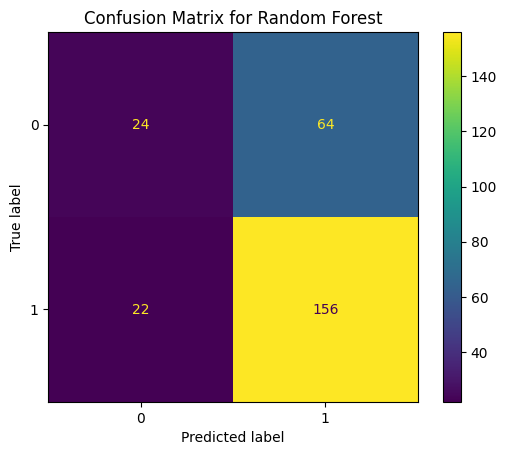

In [37]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels = rf_model.classes_)
disp_rf.plot()
disp_rf.ax_.set_title('Confusion Matrix for Random Forest')
plt.show()

In [38]:
f1_score(y_test, y_pred_rf)

0.7839195979899497

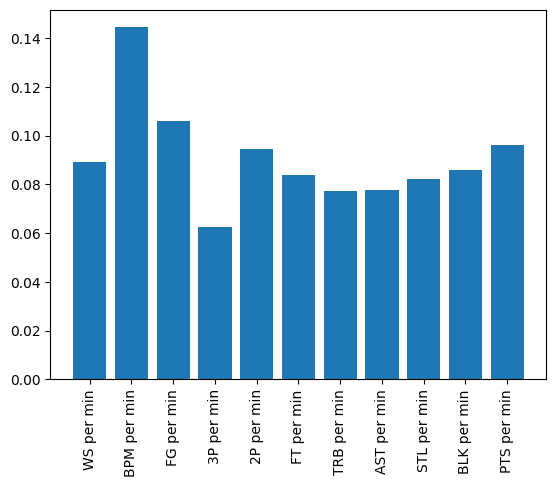

In [39]:
rf_plot_x = merged_pd.columns[3:]
rf_plot_y = rf_model.feature_importances_
plt.bar(rf_plot_x, rf_plot_y)
plt.xticks(rf_plot_x, rotation='vertical')
plt.show()

In [40]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB().fit(X_train, y_train.values.ravel())

In [41]:
y_pred_nb = nb_model.predict(X_test)
accuracy_score(y_pred_nb, y_test)

0.631578947368421

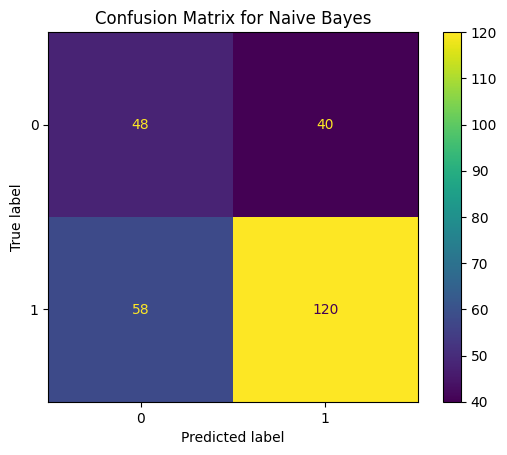

In [43]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(cm_nb, display_labels = nb_model.classes_)
disp_nb.plot()
disp_nb.ax_.set_title('Confusion Matrix for Naive Bayes')
plt.show()

In [44]:
f1_score(y_test, y_pred_nb)

0.7100591715976332

In [45]:
# SVM
from sklearn import svm
svm_model = svm.SVC().fit(X_train, y_train.values.ravel())

In [46]:
y_pred_svm = svm_model.predict(X_test)
accuracy_score(y_pred_svm, y_test)

0.6766917293233082

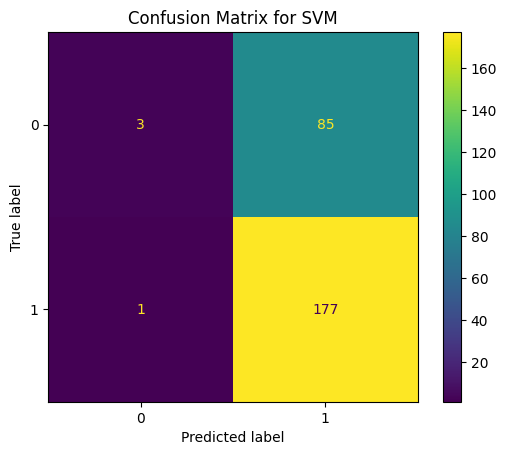

In [48]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(cm_svm, display_labels = svm_model.classes_)
disp_svm.plot()
disp_svm.ax_.set_title('Confusion Matrix for SVM')
plt.show()

In [49]:
f1_score(y_test, y_pred_svm)

0.8045454545454545